In [1]:
import numpy as np
import pandas as pd

READING DATASET


In [2]:
data = pd.read_csv("/content/drive/MyDrive/labeledTrainData.tsv", delimiter ='\t')

In [3]:
data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [5]:
data.columns

Index(['id', 'sentiment', 'review'], dtype='object')

In [6]:
data.isna().sum()

id           0
sentiment    0
review       0
dtype: int64

In [7]:
data.shape

(25000, 3)

In [8]:
data.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


TEXT PREPROCESSING

In [9]:
x = data[["review"]]

In [10]:
x['review'] = x['review'].astype(str)

<ipython-input-10-23845ff25a74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['review'] = x['review'].astype(str)


In [11]:
import re                 ##imports the re module, which provides regular expression matching operations for pattern matching and text manipulation.
import nltk               ##imports the nltk library,stands for Natural Language Toolkit.NLTK is a popular library for natural language processing tasks,such as tokenization,stemming,lemmatization, and more.
import spacy              ##imports the spacy library,another powerful library for natural language processing.
import string
from nltk.tokenize import word_tokenize ##imports the word_tokenize function from the nltk.tokenize module.

In [12]:
from nltk.corpus import stopwords  ##'stopwords' module allows you to access and use predefined stopword lists for various languages.
from nltk.stem import WordNetLemmatizer,PorterStemmer ##'WordNetLemmatizer' class from NLTK's stem module provides functionality for lemmatization,'PorterStemmer' is a widely used stemming algorithm that applies a set of rules to perform stemming.

In [13]:
nltk.download('stopwords')  ##download the necessary stopwords
nltk.download('wordnet')  ##it fetches the WordNet data from the NLTK repository.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
# Since we have three columns in which the sentiment column is target variable and id is not required for training so we will pre process the training data containing reviews only
# Each review is in the form of a paragraph with HTML tags, punctuations, numbers and stopwords such as is, are am etc so we need to clean them
# For cleaning below is the function which uses beautifulsoup, regular expression and natural language toolkit to achieve the above
    def remove_mentions(text):
        # Regular expression pattern to match mentions
        mention_pattern = r'@[\w_]+'

        # Remove mentions using regular expression substitution
        cleaned_text = re.sub(mention_pattern, '', text)

        return cleaned_text

    # Remove mentions from the text
    text = remove_mentions(text)

     # Remove backslashes
    text = text.replace('\\', '')

    text = text.replace("'''", '')

    # Remove double quotes
    text = text.replace('"', '')

    # Tokenization
    tokens = word_tokenize(text)

    # Lowercasing
    tokens = [token.lower() for token in tokens]

    # Handling contractions
    contractions = {
        "n't": "not",
        "'s": "is",
        "'re": "are",
        "'ve": "have"

    }
    tokens = [contractions[token] if token in contractions else token for token in tokens]

    # Removing stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stemming
    #stemmer = PorterStemmer()
    #tokens = [stemmer.stem(token) for token in tokens]

    return tokens

x['cleaned_review'] = x['review'].apply(clean_text)

<ipython-input-15-e766ddf79a85>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cleaned_review'] = x['review'].apply(clean_text)


In [16]:
x['cleaned_review'].head()

0    [stuff, going, moment, mj, started, listening,...
1    [classic, war, world, timothy, hines, entertai...
2    [film, start, manager, nicholas, bell, giving,...
3    [must, assumed, praised, film, greatest, filme...
4    [superbly, trashy, wondrously, unpretentious, ...
Name: cleaned_review, dtype: object

In [17]:
data['cleaned_full_review'] = x['cleaned_review']

In [18]:
data.head()

,id,sentiment,review,cleaned_full_review
0,5814_8,1,With all this stuff going down at the moment w...,"[stuff, going, moment, mj, started, listening,..."
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...","[classic, war, world, timothy, hines, entertai..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,"[film, start, manager, nicholas, bell, giving,..."
3,3630_4,0,It must be assumed that those who praised this...,"[must, assumed, praised, film, greatest, filme..."
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,"[superbly, trashy, wondrously, unpretentious, ..."


In [19]:
data.head()

,id,sentiment,review,cleaned_full_review
0,5814_8,1,With all this stuff going down at the moment w...,"[stuff, going, moment, mj, started, listening,..."
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...","[classic, war, world, timothy, hines, entertai..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,"[film, start, manager, nicholas, bell, giving,..."
3,3630_4,0,It must be assumed that those who praised this...,"[must, assumed, praised, film, greatest, filme..."
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,"[superbly, trashy, wondrously, unpretentious, ..."


COUNTING WORD OCCURENCES

In [20]:
from collections import Counter

all_words = [word for sublist in data['cleaned_full_review'] for word in sublist]

# Count the occurrences of each word
word_counts = Counter(all_words)

# Get the most common words and their counts
most_common_words = word_counts.most_common(15)  # Change '10' to get more or fewer words

# Print the most common words and their counts
for word, count in most_common_words:
    print(f'{word}: {count}')

br: 101871
movie: 50008
film: 45496
one: 26814
like: 20209
time: 15014
good: 14709
character: 13870
would: 13387
story: 12722
even: 12609
get: 12426
make: 11924
see: 11812
really: 11701


WORDCLOUD

In [21]:
all_words=[]
for i in data['cleaned_full_review']:
  review = i
  review=' '.join(review)                # joining the words to rearrage to form the sent without stop words
  all_words.append(review)

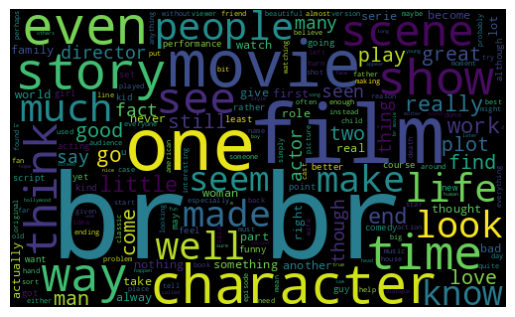

In [22]:
#picturing the most used words
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Plot The Word Cloud
allWords=" ".join(all_words)
wordCloud = WordCloud(width =500, height=300, random_state=21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

MODEL BUILDING AND EVALUATION USING BAG OF WORDS

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
corpus=[]
for i in data['cleaned_full_review']:
  review = i
  review=' '.join(review)                # joining the words to rearrage to form the sent without stop words
  corpus.append(review)

In [25]:
# Converting the Words to Vector using Bag of words

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2500,ngram_range=(1,3)) # top 2500 features are taken
X=cv.fit_transform(corpus).toarray()
y=data['sentiment']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1,stratify=y)

In [26]:
#Naive Bayes Model

from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)
MultinomialNB()
train_pred=nb.predict(x_train)
test_pred=nb.predict(x_test)
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2487
           1       0.84      0.84      0.84      2513

    accuracy                           0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000



In [27]:
#Random Forest Model

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
RandomForestClassifier()
train_pred=rfc.predict(x_train)
test_pred=rfc.predict(x_test)
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      2532
           1       0.83      0.84      0.83      2468

    accuracy                           0.83      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       0.83      0.83      0.83      5000



In [28]:
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)
LinearSVC()
train_pred=SVCmodel.predict(x_train)
test_pred = SVCmodel.predict(x_test)
print(classification_report(test_pred,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2503
           1       0.84      0.84      0.84      2497

    accuracy                           0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000



In [29]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(x_train, y_train)
LogisticRegression()
train_pred=LRmodel.predict(x_train)
test_pred = LRmodel.predict(x_test)
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2497
           1       0.85      0.85      0.85      2503

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



In [30]:
# Xgboost  Model

from xgboost import XGBClassifier
XGB = XGBClassifier()

XGB.fit(x_train,y_train)
MultinomialNB()
train_pred=XGB.predict(x_train)
test_pred=XGB.predict(x_test)
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      2427
           1       0.86      0.84      0.85      2573

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



MODEL BUILDING AND EVALUATION USING TFIDF

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(ngram_range=(1,3),max_features=3000)
X=tf.fit_transform(corpus).toarray()
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1,stratify=y)

In [32]:
# Naive Bayes Model

nb.fit(x_train,y_train)
MultinomialNB()
train_pred=nb.predict(x_train)
test_pred=nb.predict(x_test)
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      2447
           1       0.86      0.84      0.85      2553

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



In [33]:
# Random Forest Model

rfc.fit(x_train,y_train)
RandomForestClassifier(n_estimators=[200],criterion='entropy',max_depth=[5,10,20,25])
train_pred=rfc.predict(x_train)
test_pred=rfc.predict(x_test)
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      2525
           1       0.83      0.84      0.84      2475

    accuracy                           0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000



In [34]:
SVCmodel.fit(x_train, y_train)
LinearSVC()
train_pred=SVCmodel.predict(x_train)
test_pred = SVCmodel.predict(x_test)
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2495
           1       0.86      0.86      0.86      2505

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



In [35]:
LRmodel.fit(x_train, y_train)
LogisticRegression()
train_pred=LRmodel.predict(x_train)
test_pred = LRmodel.predict(x_test)
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2483
           1       0.87      0.87      0.87      2517

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



In [36]:
# Xgboost  Model

from xgboost import XGBClassifier
XGB = XGBClassifier()

XGB.fit(x_train,y_train)
MultinomialNB()
train_pred=XGB.predict(x_train)
test_pred=XGB.predict(x_test)
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      2399
           1       0.87      0.84      0.85      2601

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



Tf idf method has the greater accuracy with Logistic Regression algorithm

EVALUATING THE MODEL'S PERFORMANCE

In [37]:
def sentiments(test):
  if test == 0:
    print("Negative")
  if test == 1 :
    print("Positive")


In [38]:
print('Test 1')
test1 = ["movie was really good"]
test_vec = tf.transform(test1)
predict = LRmodel.predict(test_vec)
print('The Predicted Rating is :',predict)
sentiments(predict)

Test 1
The Predicted Rating is : [1]
Positive


In [39]:
print('Test 2')
test2 = [" Lost in the Wilderness is a disjointed and disappointing film with a convoluted plot, poorly developed characters, subpar acting, and unimpressive special effects, ultimately failing to deliver an engaging cinematic experience."]
test_vec = tf.transform(test2)
predict = LRmodel.predict(test_vec)
print('The Predicted Rating is :',predict)
sentiments(predict)

Test 2
The Predicted Rating is : [0]
Negative


MODEL BUILDING AND EVALUATION USING LSTM

In [40]:
import nltk
nltk.download('wordnet')
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [41]:
data['cleaned_full_review'].head()



0    [stuff, going, moment, mj, started, listening,...
1    [classic, war, world, timothy, hines, entertai...
2    [film, start, manager, nicholas, bell, giving,...
3    [must, assumed, praised, film, greatest, filme...
4    [superbly, trashy, wondrously, unpretentious, ...
Name: cleaned_full_review, dtype: object

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   25000 non-null  object
 1   sentiment            25000 non-null  int64 
 2   review               25000 non-null  object
 3   cleaned_full_review  25000 non-null  object
dtypes: int64(1), object(3)
memory usage: 781.4+ KB


In [43]:
data.head()

,id,sentiment,review,cleaned_full_review
0,5814_8,1,With all this stuff going down at the moment w...,"[stuff, going, moment, mj, started, listening,..."
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...","[classic, war, world, timothy, hines, entertai..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,"[film, start, manager, nicholas, bell, giving,..."
3,3630_4,0,It must be assumed that those who praised this...,"[must, assumed, praised, film, greatest, filme..."
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,"[superbly, trashy, wondrously, unpretentious, ..."


In [46]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()


def clean_text(text):
    text = re.sub(r'[^\w\s]','',text, re.UNICODE)
    text = text.lower()
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    text = [word for word in text if not word in stop_words]
    text = " ".join(text)
    return text

data['Processed_Reviews'] = data.review.apply(lambda x: clean_text(x))

In [47]:
data.head()

,id,sentiment,review,cleaned_full_review,Processed_Reviews
0,5814_8,1,With all this stuff going down at the moment w...,"[stuff, going, moment, mj, started, listening,...",stuff go moment mj ive start listen music watc...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...","[classic, war, world, timothy, hines, entertai...",classic war world timothy hines entertain film...
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,"[film, start, manager, nicholas, bell, giving,...",film start manager nicholas bell give welcome ...
3,3630_4,0,It must be assumed that those who praised this...,"[must, assumed, praised, film, greatest, filme...",must assume praise film greatest film opera ev...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,"[superbly, trashy, wondrously, unpretentious, ...",superbly trashy wondrously unpretentious 80 ex...


In [48]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers


max_features = 6000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(data['Processed_Reviews'])
list_tokenized_train = tokenizer.texts_to_sequences(data['Processed_Reviews'])

maxlen = 130
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
y = data['sentiment']

embed_size = 128
model = Sequential()
model.add(Embedding(max_features, embed_size))
model.add(Bidirectional(LSTM(32, return_sequences = True)))
model.add(GlobalMaxPool1D())
model.add(Dense(20, activation="relu"))
model.add(Dropout(0.05))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_size = 100
epochs = 3
model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/3
200/200 [==============================] - 47s 197ms/step - loss: 0.4377 - accuracy: 0.7979 - val_loss: 0.3133 - val_accuracy: 0.8656
Epoch 2/3
200/200 [==============================] - 21s 107ms/step - loss: 0.2360 - accuracy: 0.9084 - val_loss: 0.3153 - val_accuracy: 0.8718
Epoch 3/3
200/200 [==============================] - 11s 56ms/step - loss: 0.1735 - accuracy: 0.9369 - val_loss: 0.3443 - val_accuracy: 0.8692


In [58]:


# New sentence for prediction
new_sentence = "This movie was really good and engaging."

# Preprocess the new sentence
preprocessed_sentence = clean_text(new_sentence)  # Make sure you have defined your clean_text function

# Tokenize the preprocessed sentence
list_tokenized_sentence = tokenizer.texts_to_sequences([preprocessed_sentence])

# Pad the tokenized sequence
padded_sentence = pad_sequences(list_tokenized_sentence, maxlen=maxlen)

# Predict sentiment using the trained model
prediction = model.predict(padded_sentence)

# Print the prediction (positive if close to 1, negative if close to 0)
if prediction >= 0:
    print("Positive sentiment")
elif prediction == 0:
    print("Negative sentiment")


1/1 [==============================] - 0s 26ms/step
Positive sentiment
